# Simulated dynamics with initial conditions and parameters based on data

This notebook provides figures that show the *simulated dynamics* of the model using the initial conditions based on each of the data sets and parameters inferred from data (see `math_PhD.ipynb`,`parakeet.ipynb`, and `newcomb_frat.ipynb` for the figures related to the *inference*). 

In [1]:
import numpy as np
from numba import jit

from py.model import *
from py.scores import *
from py.utils import *
# from SpringRank import SpringRank

from matplotlib import pyplot as plt  # use matplotlib version 3.2.2 or earlier

import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Arial Unicode MS"
matplotlib.rcParams['mathtext.fontset'] = "dejavusans"

# Setup: 

In [106]:
cset = ['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377']
cset_muted = ['#CC6677', '#332288', '#DDCC77', '#117733', '#88CCEE', '#882255', '#44AA99', '#999933', '#AA4499', '#DDDDDD','#000000']

SMALL_SIZE = 8
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [6]:
@jit(nopython=True)
def linear_feature(s):
    return(np.outer(np.ones(len(s)), s))

def quadratic_feature(s):
    S = linear_feature(s)
    V = (S - S.T)**2
    return(V)

In [125]:
def dynamics_gridplot(BETA_1, BETA_2, score_function, m_updates, ymin = -0.05, ymax = 0.6):

    np.random.seed(seed=6)

    highlight_col = 0

    lam = .995
    n_rounds = 4000

    n = 8
    A0 = np.random.rand(n,n)
    A0 = A0/A0.sum()
    
    fig, axarr = plt.subplots(len(BETA_1), len(BETA_2), figsize = (7.2, 6.5))

    for i in np.arange(len(BETA_1)):
        for j in np.arange(len(BETA_2)):

            row_num = i
            col_num = j

            ax = axarr[row_num,col_num]
            beta_1 = BETA_1[row_num]
            beta_2 = BETA_2[col_num]

            M = model()
            M.set_score(score_function = score_function)
            M.set_features([linear_feature, 
                            quadratic_feature])

            M.simulate(beta      = np.array([beta_1, beta_2]), 
                       lam       = lam, 
                       A0        = A0, 
                       n_rounds  = n_rounds, 
                       update    = stochastic_update, 
                       m_updates = m_updates)
            GAMMA = M.get_rates()

            for k in range(n):
                p = ax.plot(GAMMA.mean(axis = 1)[np.int(n_rounds/2):,k], color = cset_muted[k])

            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)

            ax.set(ylim = (ymin, ymax))
            ax.set(xlim = (0, np.int(n_rounds/2)))
            ax.tick_params()

#             if row_num < len(BETA_1)-1:
#                 ax.xaxis.set_ticks([])
#                 plt.xticks([])

            if row_num == len(BETA_1)-1:
                ax.set(xlabel = r'Time step ($t$)')
            ax.set(ylabel = r'Rank ($\gamma$)')

            ax.set_title(
                r'$\beta_1 = $' + str(round(beta_1,2)) + r'$\;$,$\;$ $\beta_2 = $' + str(round(beta_2,2)), #v3/4
            )
            ax.yaxis.set_label_coords(-0.15,0.5)
            
#     # add colorbar
#     for barloc in [0.365,0.365*2.18]:
#         cbar_ax = fig.add_axes([barloc, 0.03, 0.06, 0.02])
#         cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
#         # cbar.set_clim(0.0,0.06)
#         cbar.set_ticks([.00,.03,0.06])
#         cbar.ax.tick_params(labelsize=fontsize)
#         cbar.ax.set_title('Weights',fontsize=fontsize,y=0.65)
#         cbar_ax.xaxis.set_ticks_position('bottom')

    # add panel labels
#     labels = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)']
#     for i, label in enumerate(labels[0:len(BETA_1)*len(BETA_2)]):
#         ax = axarr[i%len(BETA_2),(i//len(BETA_2))]
#         hloc = -0.24
#         vloc = 1.20
#         ax.text(hloc, vloc, label, transform=ax.transAxes, weight='bold', va='top', ha='right')

    plt.tight_layout()

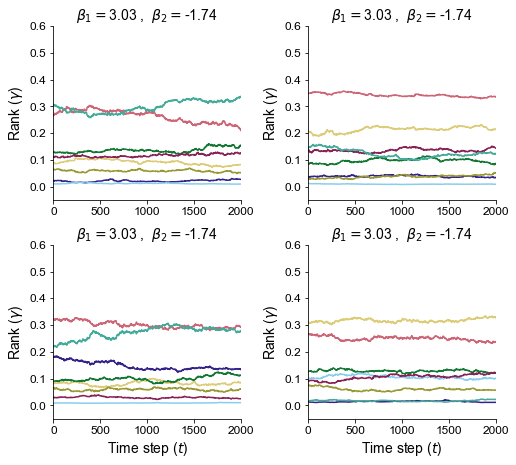

In [126]:
# same as the SpringRank version above
dynamics_gridplot(np.array([3.03,3.03]), np.array([-1.74,-1.74]), lambda A: homebrew_SpringRank_score(A.T), 2)
# plt.savefig('fig/dynamics_springrank_examples.png', bbox_inches = 'tight', dpi = 600)

In [133]:
aaa = np.array([-1.74,-1.74])
bbb = np.array([-1.7,-1.7])
for (i,j) in tuple(zip(aaa,bbb)):
    print((i,j))

(-1.74, -1.7)
(-1.74, -1.7)


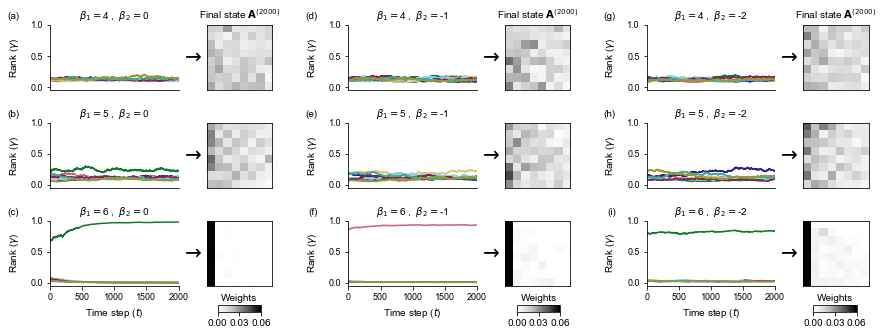

In [9]:
dynamics_gridplot(np.array([4, 5, 6]), np.array([0,-1,-2]), lambda A: powered_degree_score(A, 0.5), ymax = 1)
# plt.savefig('fig/dynamics_root_degree_examples.png', bbox_inches = 'tight', dpi = 600)

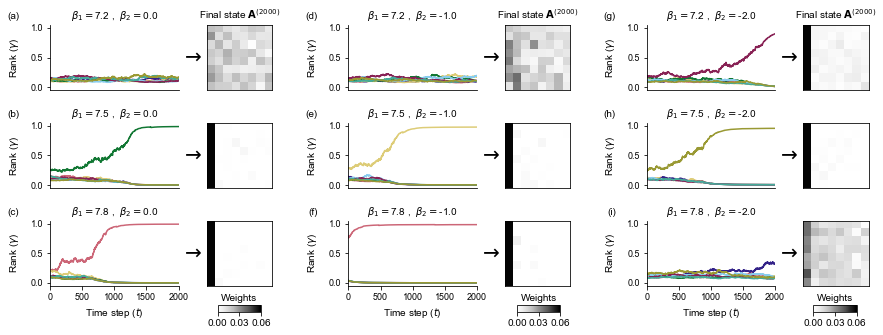

In [10]:
dynamics_gridplot(np.array([7.2, 7.5, 7.8]), np.array([0.0,-1.0,-2.0]), lambda A: PageRank_score(A), ymax = 1.05)
# plt.savefig('fig/dynamics_pagerank_examples.png', bbox_inches = 'tight', dpi = 600)